In [1]:
# 一个cell做多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

Numpy 可高效处理大数组数据
> 书中内容讲述的较为浅显，详细的参考相关的有道笔记 和 jupyer中 numpy test代码 及 官网api

- 连续内存，内存消耗更下；
- 数组级别运算，避免for循环

In [2]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10):my_arr2 = my_arr*2
%time for _ in range(10):my_list2 = [x*2 for x in my_list]

Wall time: 102 ms
Wall time: 4.29 s


## ndarray 一种多维数组对象
- 1、 同构多维容器 （shape & dtype）
- 2、 基于二维数组的运算（行列级运算 及 矩阵运算） 
- 3、 常用内置函数如下：![](./datasets/np_func.png)

In [3]:
# 生成随机数据 并做运算
data = np.random.randn(2,3)
data, data+data, data*10

# 生成， 使用array函数，注意其参数
# help(np.array)

# 常用内置方法
# 1 生成特殊数组 （np.zeros/np.ones/np.empty 等 具体参考官网api）
np.zeros((3, 6))
np.empty((2,3))

# 2 常用 arange(range函数的数组版本)

(array([[ 1.2162022 , -1.63071553, -0.87647209],
        [-0.72411465, -1.42936054,  0.24885842]]),
 array([[ 2.4324044 , -3.26143107, -1.75294418],
        [-1.44822931, -2.85872107,  0.49771684]]),
 array([[ 12.16202202, -16.30715533,  -8.76472092],
        [ -7.24114653, -14.29360536,   2.48858418]]))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

array([[12.16202202, 16.30715533,  8.76472092],
       [ 7.24114653, 14.29360536,  2.48858418]])

## ndarray数据类型
- 使用dtype属性查看ndarray对象每个元素的数据类型：ndarray_obj.dtype
- 强制元素数据转换使用astype函数进行，参数为被转换的数据类型，针对全部元素，不建议在此执行，使用pandas执行更灵活
> 补充：除数值型（np.int32 np.float64 ） 其他均使用object类型，避免数据转换时精度丢失； astype的参数可视图other_obj.dtype,不过意义不大
- 

In [4]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

dtype('float64')

array([        62,          0,  498263728,          0,          1,
                0, 4294967295, 4294967295], dtype=uint32)

## Numpy数组运算
> 可进行矢量化和矩阵运算，也可进行元素运算（大小相等的数组之间的算术运算）
- 1 数组与标量的算术运算会将标量值传播到各个元素（相同坐标的元素级别运算）
- 2 大小相同的数组之间的比较会直接生成布尔数组（用来进行数据过滤，如果数据量不大 直接在pandas进行操作）

In [5]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr # 数组元素运算  不是矩阵乘法
arr.dot(arr.T) # 矩阵乘法 注意矩阵的秩

array([[1., 2., 3.],
       [4., 5., 6.]])

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

array([[14., 32.],
       [32., 77.]])

## 基本的索引和操作
> 将list的索引操作扩展为多维化（一般是二维）， 以,进行不同维度操作的分割    

- 1、 切片的结果是视图（如果直接修改 会影响原始数据），需要赋值或者copy复制（切片对象独立化）
- 2、 索引可以按照维度写成多个[], 也可以按照pandas形式写成嵌套，建议与pandas保持一致
- 3、 省略未写的维度，代表该维度全部（主要针对3维以上的数据， 不常用）
- 4、 切片索引 使用:进行不同维度的切片  arr2d[:2, 1:]
- 5、 布尔类型索引：主要用于数据筛选（前提是长度匹配）
- 6、 花式索引：利用整数数组进行索引（其实就是在不同的维度使用索引的list形式）
- 7、 特殊属性：.T transpose(二维直接T， 三维需要根据轴编号进行)  .reshape .swapaxes  # 返回的是源数据的视图

In [6]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d
arr2d.shape

# 1 直接修改
arr2d[[0,1],2] = [10,10]
arr2d

# 2 赋值 (不改变赋值数据)
arr1 = arr2d[[0,1],2]
arr2d[[0,1],2] = [22,22] # 修改切片数据 不会改变被赋值数据
arr1

# 3 复制（使用copy） 这种情况也不会改变被赋值数据
arr2d
arr1 = arr2d[[0,1],2].copy() # 其实 copy属于浅复制 与 直接赋值没区别；两者都不改变赋值数据，说明切片的对象是独立的
arr2d[[0,1],2] = [33,33] 
arr1

# 切片
arr2d[1, :2]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

(3, 3)

array([[ 1,  2, 10],
       [ 4,  5, 10],
       [ 7,  8,  9]])

array([10, 10])

array([[ 1,  2, 22],
       [ 4,  5, 22],
       [ 7,  8,  9]])

array([22, 22])

array([4, 5])

In [7]:
# 布尔索引 数据过滤
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will','Joe', 'Joe'])
data = np.random.randn(7, 4)
data

data[names == 'Bob']
data[~(names == 'Bob')]  # 非
data[(names == 'Bob') | (names == 'Will')] # 多条件

array([[-0.30527562, -1.13650137,  0.61745725, -0.36717088],
       [ 0.51912358, -0.73367577, -1.12634784, -1.43263069],
       [ 0.76619974, -0.60872158,  0.40181466,  1.49506771],
       [ 0.70459626, -0.66915263,  0.18960664, -0.2220906 ],
       [-1.04439526, -0.08156843, -0.95561304,  1.13485777],
       [ 1.09852524, -0.30726495, -0.01656268,  0.80251054],
       [ 2.59984995, -2.20074799, -1.15560655,  1.07580235]])

array([[-0.30527562, -1.13650137,  0.61745725, -0.36717088],
       [ 0.70459626, -0.66915263,  0.18960664, -0.2220906 ]])

array([[ 0.51912358, -0.73367577, -1.12634784, -1.43263069],
       [ 0.76619974, -0.60872158,  0.40181466,  1.49506771],
       [-1.04439526, -0.08156843, -0.95561304,  1.13485777],
       [ 1.09852524, -0.30726495, -0.01656268,  0.80251054],
       [ 2.59984995, -2.20074799, -1.15560655,  1.07580235]])

array([[-0.30527562, -1.13650137,  0.61745725, -0.36717088],
       [ 0.76619974, -0.60872158,  0.40181466,  1.49506771],
       [ 0.70459626, -0.66915263,  0.18960664, -0.2220906 ],
       [-1.04439526, -0.08156843, -0.95561304,  1.13485777]])

## 通用函数：快速的元素级别数组函数
> 注意 此处为元素级别的函数 数组中的每一个元素作为独立的个体参与运算 

函数| 说明 
--|--
abs/fabs | 计算整数、浮点数或者复数的绝对值。对于非复数值，可以使用更快的fabs
**sqrt** | 计算各元素的平方根 相当于arr\*\*0.5
**square** | 计算各元素的平方
exp| 计算各元素的指数$x^{2}$
log/log10/log2/log1p | 分别为自然对数（底数为e）、底数为10的log、底数为2的log、log(1+x)
**sign**| 计算各元素的正负号 1、0、-1
ceil| 大于等于该值的最小整数
floor| 小于等于该值的最大整数
rint| 各元素四舍五入到最近的整数，保留dtype
modf|将数字的小数和整数部分以两个独立的数组形式返回
isnan| 空值判断
cos/sin/tan/cosh…… | 三角函数
arccos…… | 反三角函数
logical_not | 计算各元素的not_x的真值
**add** | 将数组中对应的元素相加
**subtract**| 从第一个数组中减去第二个数组中的元素
**multilply** | 数组元素相乘 与矩阵乘法不同
**divide、floor_devide**| 除法 或 向下圆整除法 地板除（丢弃余数）
**power**| 对第一个数组中元素A,根据第二个数组中对应的相应元素B，计算$A^{B}$  
**maximum/fmax** | 元素级的最大值计算 fmax将忽略NaN
**minimum/fmin** | 元素级的最小值计算 fmmin将忽略NaN
mod| 求模
unique(x) | 计算唯一元素，返回有序结果
intersect1d（x,y）| 交集
unionld（x,y）| 并集
setdiff1d（x,y） | 差集 在x不在y
setxorld(x,y) | 结合的对称差，交集的补集

In [8]:
arr = np.arange(16).reshape(4,4)
arr
np.sqrt(arr) 

x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x, y)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335]])

array([ 0.15389467,  1.51551293,  0.87973538, -0.03469721, -0.12927358,
        2.62894544,  0.59722   , -0.34877617])

## 利用数组进行数据处理
> 主要还是元素级别的处理

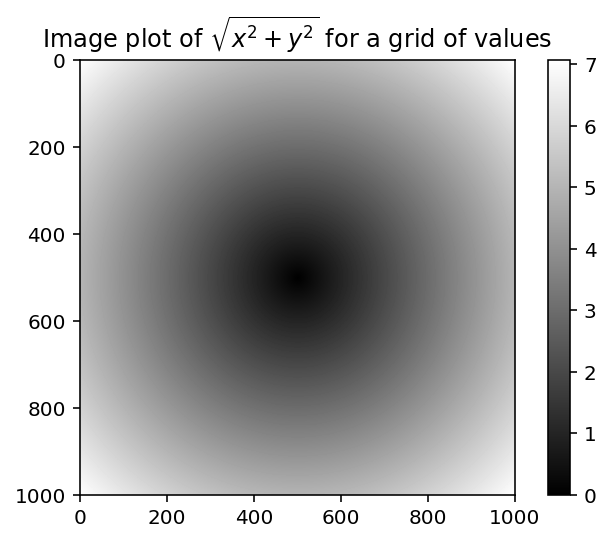

In [9]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs ** 2 + ys ** 2)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values");

## 将条件逻辑表述为数组运算
> 主要使用的是np.where 函数 进行数据筛选


In [10]:
arr = np.random.randn(4, 4)
np.where(arr > 0, 2, -1)
np.where(arr > 0, 2, arr) # where的用法与if相似

array([[ 2,  2,  2,  2],
       [ 2,  2,  2, -1],
       [ 2, -1, -1, -1],
       [ 2, -1, -1,  2]])

array([[ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -0.04206131],
       [ 2.        , -2.85549086, -0.69917122, -0.36743409],
       [ 2.        , -0.71871477, -0.16173398,  2.        ]])

## 数学和统计方法
> 注意axis参数的区别， 如果不显示的指定（None），计算的对象是整个数组  

方法| 说明
--|--
sum| 
mean| 
std/var| 标准差和方差 自由度可调
min/max | 与内置的二元函数不同 
argmin/argmax| 分别为最大和最小元素的索引
cumsum | 累积和
cumprod | 累计积 

### 用于布尔型数组的方法 
- any():一个或者多个存在True，返回True 
- all():全部为True， 返回True 

### 排序 
> 注意参数axis和key的使用；    

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身

### 唯一化以及其他的集合逻辑
- np.unique：找出数组中的唯一值并返回已排序、
- np.inld  测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组

### 数据文件保存
- load 和 save函数 针对二进制数据

In [11]:
arr = np.random.randn(5, 4)
arr.mean(); np.mean(arr) # 可作为从属和顶级方法使用


arr.mean(axis=1) # 按行计算
arr.mean(axis=0) # 按列计算

arr = np.array([1, 2, 3, 4, 5, 6, 7])
arr.cumsum() # 累积计算
arr.cumprod()

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will','Joe', 'Joe'])
np.unique(names)

values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

-0.16691240696104045

-0.16691240696104045

array([-0.32437689, -0.16175738, -0.62873303,  0.37490027, -0.094595  ])

array([ 0.01383782, -0.54895959, -0.37174786,  0.23922001])

array([ 1,  3,  6, 10, 15, 21, 28], dtype=int32)

array([   1,    2,    6,   24,  120,  720, 5040], dtype=int32)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

array([ True, False, False,  True,  True, False,  True])

In [12]:
# 二进制文件保存
arr = np.arange(10)
np.save('some_array', arr) # 自动添加文件后缀名.npy
np.load('some_array.npy')

np.savez('array_archive.npz', a=arr, b=arr) # savez 函数 保存多个数组
arch = np.load('array_archive.npz')
arch['b']

np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)  # 数据压缩

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 线性代数 
> 该部分还是主要参考官网api， 有时间去回顾一下线性代数相关知识

[官网文档](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) 每种方法下面均有示例（现代的相关文档见有道云笔记）   

函数| 说明
--|--
diag| 以一维数组的形式返回方阵的对角线（或非对角线）的元素，或将一维数组转换为方阵（非对角线元素为0）
dot| 矩阵乘法
trace | 计算对角线元素的和
det| 计算矩阵的行列式
eig| 计算方阵的特征值和特征向量
inv| 方阵求逆
pinv| 矩阵伪逆
qr|qr分解
svd|svd分解
solve|解线性方程组Ax=b，其中A是一个方阵
lstsq|计算Ax=b的最小二乘


In [13]:
# 矩阵乘法
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.shape; y.shape

x.dot(y); np.dot(x,y)

# @符（类似Python 3.5）也可以用作中缀运算符，进行矩阵乘法：
x @ np.ones(3)

(2, 3)

(3, 2)

array([[ 28.,  64.],
       [ 67., 181.]])

array([[ 28.,  64.],
       [ 67., 181.]])

array([ 6., 15.])

In [14]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X) 
inv(mat) # 逆矩阵
mat
mat.dot(inv(mat)) # 产生对角矩阵

array([[17.49605902,  3.49303653, -1.85153957, -4.05735289, -1.53704874],
       [ 3.49303653,  2.37998888, -0.61766479, -0.64108775, -0.29677924],
       [-1.85153957, -0.61766479,  0.45952866,  0.42838216,  0.08870008],
       [-4.05735289, -0.64108775,  0.42838216,  1.03659719,  0.35879566],
       [-1.53704874, -0.29677924,  0.08870008,  0.35879566,  0.23843327]])

array([[ 0.97780832, -0.38152536,  0.3544086 ,  3.07433953,  1.07038123],
       [-0.38152536,  0.90417784,  1.03864637, -1.60259711,  0.69115775],
       [ 0.3544086 ,  1.03864637,  5.93961312, -1.8752312 ,  4.18973672],
       [ 3.07433953, -1.60259711, -1.8752312 , 13.29666463, -1.48746114],
       [ 1.07038123,  0.69115775,  4.18973672, -1.48746114, 12.63420175]])

array([[ 1.00000000e+00, -2.22044605e-16,  1.38777878e-16,
        -5.55111512e-17,  1.11022302e-16],
       [ 6.66133815e-16,  1.00000000e+00,  3.46944695e-17,
        -4.16333634e-16,  1.38777878e-16],
       [ 8.88178420e-16,  4.44089210e-16,  1.00000000e+00,
        -2.22044605e-16,  2.22044605e-16],
       [ 3.55271368e-15,  7.77156117e-16, -3.05311332e-16,
         1.00000000e+00,  5.55111512e-17],
       [ 0.00000000e+00,  8.88178420e-16,  0.00000000e+00,
        -1.77635684e-15,  1.00000000e+00]])

## 伪随机数生成 
> 主要是对numpy的random模块进行讲解，基于cpython实现且机制不同 效率较高

函数|说明
--|--
**seed**|<font color=red size=3 face=“黑体”>确定随机数生成器的种子</font>
permutation|返回一个序列的随机排列或返回一个随机排列的范围
**shuffle**| 对一个序列就地随机排列
**rand**| <table><tr><td bgcolor=orange> 产生均匀分布的样本值</td></tr></table>
**randint** | 从给定的上下限范围内随机选取整数
**randn** | 产生正态分布的样本值（均值为0，标准差为1）
binomial| 产生二项分布的样本值
normal| 产生正态(高斯)分布的样本值
beta| 产生beta分布的样本值
chisquare| 产生卡方分布的样本值
gamma| 产生gamma分布的样本值
uniform| 产生在(0,1)均匀分布的样本值

In [15]:
from random import normalvariate
N = 1000000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

4.59 s ± 661 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
159 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 示例：随机漫步
###  传统的纯python实现：

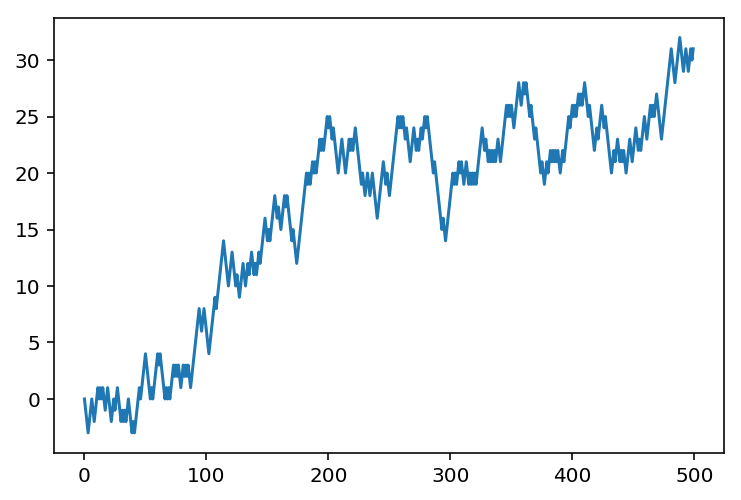

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1  # 包含1 
    position += step
    walk.append(position)
    
ser1 = pd.Series(walk)
ser1[:500].plot();

### 使用numpy实现：

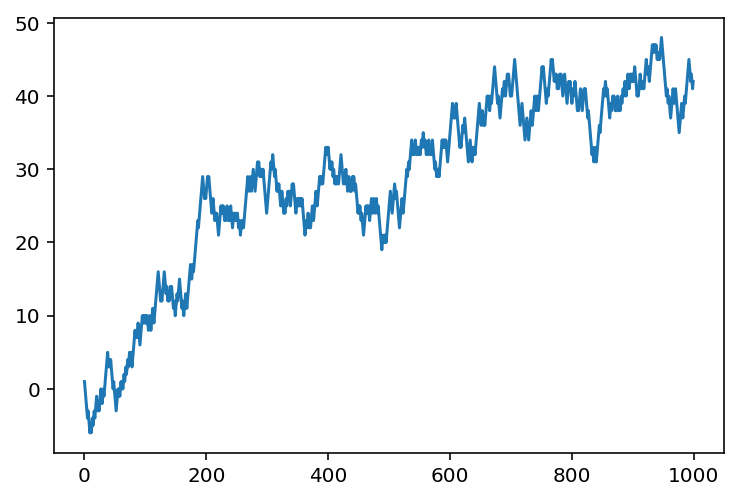

In [17]:
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps) # 不含第二个范围参数2
steps = np.where(draws>0,-1,1)
walk = steps.cumsum()  # 巧妙使用累加
pd.Series(walk).plot();

### 一次模拟多个随机漫步

In [18]:
nwalks = 5000;nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
# help(np.random.randint)

steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

walks.max();walks.min() # 最值

hits30 = (np.abs(walks) >= 30).any(1) # 数据筛选

crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)

steps = np.random.normal(loc=0, scale=0.25,size=(nwalks, nsteps))

129

-119